<a href="https://colab.research.google.com/github/LeonardVG/cv-study-02-dlib-face-detection/blob/main/Dlib_HOG_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção Facial com Dlib (HOG & CNN)

Neste segundo estudo de Visão Computacional, avançamos dos métodos básicos (Haar Cascade) para algoritmos mais robustos disponíveis na biblioteca **Dlib**.

Aqui exploraremos duas abordagens distintas: o clássico **HOG** (Machine Learning) e a moderna **CNN** (Deep Learning).

## HOG (Histogram of Oriented Gradients)
O **HOG** é um descritor de características que, ao contrário do Haar (que olha apenas diferenças de luz e sombra), analisa a **direção das bordas** (gradientes) na imagem.

* **Como funciona:** A imagem é dividida em pequenas células. O algoritmo calcula para onde a mudança de intensidade dos pixels está "apontando" (o gradiente). O resultado é um histograma que desenha a "forma" do rosto baseada em suas bordas, ignorando cores ou iluminação uniforme.
* **Classificador:** Geralmente usado em conjunto com um **SVM** (Support Vector Machine) linear para classificar se aquele padrão de bordas é um rosto ou não.
* **Prós/Contras:** É mais preciso que o Haar Cascade e sofre menos com falsos positivos, mas ainda exige que o rosto esteja majoritariamente frontal.

## CNN (Convolutional Neural Network)
A implementação MMOD (*Max-Margin Object Detection*) do Dlib utiliza **Deep Learning**.

* **Como funciona:** Uma rede neural profunda foi treinada com milhões de imagens para aprender características complexas (texturas, formas, profundidade). Diferente dos métodos manuais, a rede "aprendeu" sozinha o que define um rosto.
* **Prós/Contras:**
Detecta rostos de perfil, parcialmente cobertos ou com iluminação difícil. Porém, é **computacionalmente pesado**. Sem uma GPU, o processamento na CPU pode ser muito lento.

## O Parâmetro Upsampling
Ao contrário do Haar Cascade (que tem `scaleFactor`), no Dlib passamos um número inteiro que representa o **Upsampling** (aumento da imagem):

* `0`: Processa a imagem no tamanho original. (Mais rápido).
* `1`: Dobra o tamanho da imagem antes de processar. (Padrão para detectar rostos menores).
* `2, 3, 4...`: Aumenta a imagem exponencialmente. Permite detectar rostos minúsculos, mas o tempo de processamento cresce drasticamente.

---


##Importando bibliotecas, método e conectando ao google drive

In [1]:
import dlib
import cv2
from google.colab.patches import cv2_imshow

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


##Detecção de Faces com o HOG

In [9]:
img =  cv2.imread('/content/drive/MyDrive/Colab Notebooks/Visao_Computacional/Curso-GuiaCompleto/Images/ImagesCascade/people2.jpg')

detector_face_hog = dlib.get_frontal_face_detector()
deteccoes = detector_face_hog(img,1)#o segundo argumento é Upsample, aumentando ele, conseguimos pegar rotos menores

(rectangles[[(429, 38) (465, 74)], [(665, 90) (701, 126)], [(717, 103) (760, 146)], [(909, 70) (952, 113)], [(828, 98) (871, 142)], [(605, 70) (641, 106)], [(777, 62) (813, 98)], [(485, 78) (521, 114)], [(386, 60) (429, 103)], [(170, 41) (213, 84)], [(93, 89) (136, 132)], [(237, 50) (280, 94)], [(323, 50) (367, 94)], [(544, 65) (588, 108)]],
 14)

In [19]:
n=1
for face in deteccoes:
  print(f"face {n}:",)
  print(f"[l= {face.left()}, t={face.top()}, r= {face.right()}, b={face.bottom()}]")
  print("---------------------------------")
  n = n+1

face 1:
[l= 429, t=38, r= 465, b=74]
---------------------------------
face 2:
[l= 665, t=90, r= 701, b=126]
---------------------------------
face 3:
[l= 717, t=103, r= 760, b=146]
---------------------------------
face 4:
[l= 909, t=70, r= 952, b=113]
---------------------------------
face 5:
[l= 828, t=98, r= 871, b=142]
---------------------------------
face 6:
[l= 605, t=70, r= 641, b=106]
---------------------------------
face 7:
[l= 777, t=62, r= 813, b=98]
---------------------------------
face 8:
[l= 485, t=78, r= 521, b=114]
---------------------------------
face 9:
[l= 386, t=60, r= 429, b=103]
---------------------------------
face 10:
[l= 170, t=41, r= 213, b=84]
---------------------------------
face 11:
[l= 93, t=89, r= 136, b=132]
---------------------------------
face 12:
[l= 237, t=50, r= 280, b=94]
---------------------------------
face 13:
[l= 323, t=50, r= 367, b=94]
---------------------------------
face 14:
[l= 544, t=65, r= 588, b=108]
--------------------------

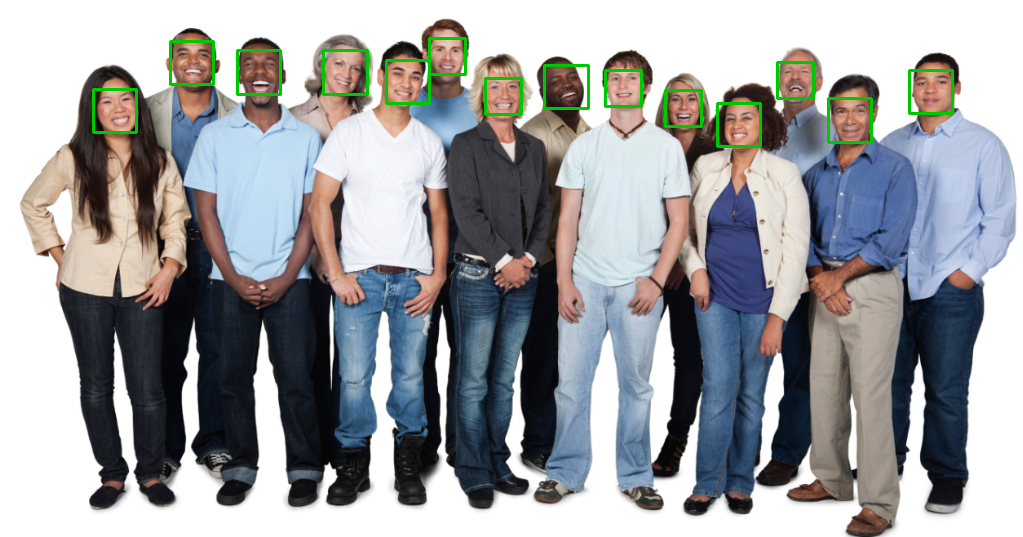

In [10]:
for face in deteccoes:
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(img, (l,t),(r,b), [0,200,0], 2)

cv2_imshow(img)

###explorando a mudança de escala no HOG

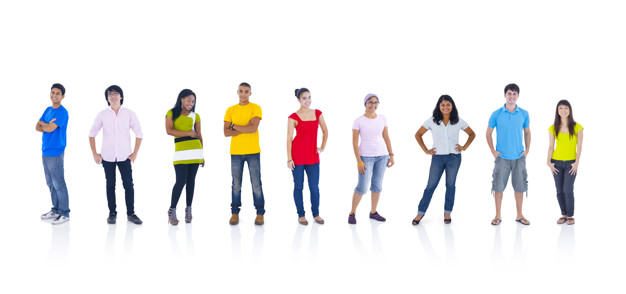

In [7]:
img =  cv2.imread('/content/drive/MyDrive/Colab Notebooks/Visao_Computacional/Curso-GuiaCompleto/Images/ImagesCascade/people3.jpg')

detector_face_hog = dlib.get_frontal_face_detector()
deteccoes = detector_face_hog(img,1)

for face in deteccoes:
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(img, (l,t),(r,b), [0,200,0], 2)

cv2_imshow(img)

Como podemos ver, pelas faces serem muito pequenas nessa imagem, o HOG não consegue detectar.

Vamos modificar a escala!

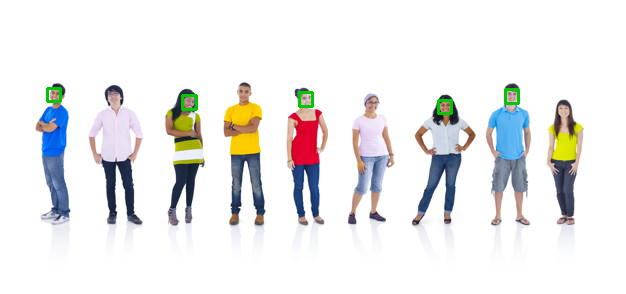

In [6]:
img =  cv2.imread('/content/drive/MyDrive/Colab Notebooks/Visao_Computacional/Curso-GuiaCompleto/Images/ImagesCascade/people3.jpg')

detector_face_hog = dlib.get_frontal_face_detector()
deteccoes = detector_face_hog(img,4)

for face in deteccoes:
  l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
  cv2.rectangle(img, (l,t),(r,b), [0,200,0], 2)

cv2_imshow(img)

##Detecção de Faces com CNN do Dlib

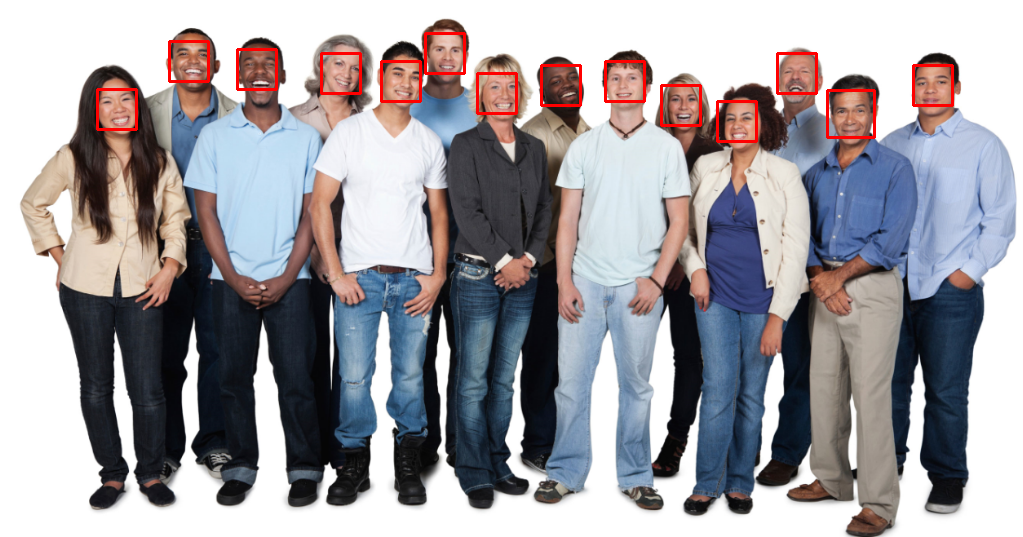

In [7]:
imagem = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Visao_Computacional/Curso-GuiaCompleto/Images/ImagesCascade/people2.jpg')
imagem_rgb = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)#A rede neural aprendeu padrões de pele e texturas baseadas em RGB, por isso temos que converter

detector_face_cnn = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/Colab Notebooks/Visao_Computacional/Curso-GuiaCompleto/pesos/mmod_human_face_detector.dat')
deteccoes = detector_face_cnn(imagem_rgb,1)

for face in deteccoes:
  l, t, r, b, confianca = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence #o objeto de retorno é mmod_rect, tem que acessar .rect
  cv2.rectangle(imagem, (l,t),(r,b), [0,0,255], 2)

cv2_imshow(imagem)

###explorando a mudança de escala na CNN

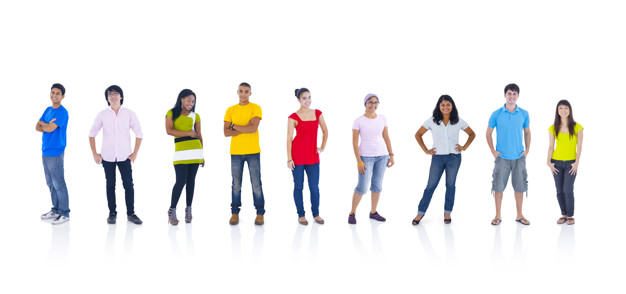

In [8]:
img3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Visao_Computacional/Curso-GuiaCompleto/Images/ImagesCascade/people3.jpg')
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
deteccoes = detector_face_cnn(img3_rgb,1)

for face in deteccoes:
  l, t, r, b, confianca = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  cv2.rectangle(img3, (l,t),(r,b), [0,0,0], 2)

cv2_imshow(img3)

Como podemos ver, pelas faces serem muito pequenas nessa imagem, a CNN não consegue detectar.

Vamos modificar a escala!

1.087091088294983
1.0784251689910889
1.0692929029464722
1.0602856874465942
1.0312224626541138
1.009389877319336
0.9138050079345703


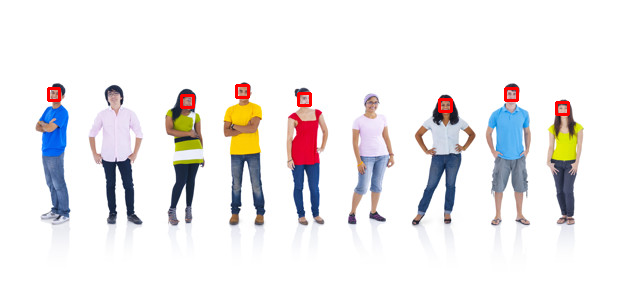

In [2]:
img3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Visao_Computacional/Curso-GuiaCompleto/Images/ImagesCascade/people3.jpg')
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

detector_face_cnn = dlib.cnn_face_detection_model_v1('/content/drive/MyDrive/Colab Notebooks/Visao_Computacional/Curso-GuiaCompleto/pesos/mmod_human_face_detector.dat')
deteccoes = detector_face_cnn(img3_rgb,3)

for face in deteccoes:
  l, t, r, b, confianca = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
  print(confianca)
  cv2.rectangle(img3, (l,t),(r,b), [0,0,255], 2)

cv2_imshow(img3)

##Comparativos


HOG | Tempo: 8.7539s | Faces: 5
CNN | Tempo: 43.8467s | Faces: 7
Resultado HOG:


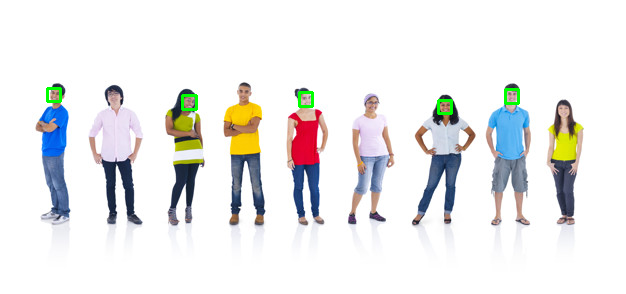

Resultado CNN:


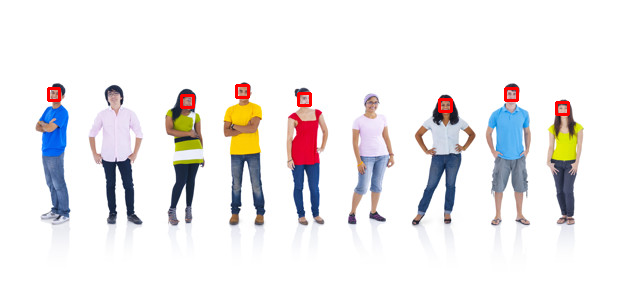

In [4]:
import cv2
import dlib
import time
from google.colab.patches import cv2_imshow

# Carregamento e Conversão
imagem_path = '/content/drive/MyDrive/Colab Notebooks/Visao_Computacional/Curso-GuiaCompleto/Images/ImagesCascade/people3.jpg' # Ajuste se necessário
img_bgr = cv2.imread(imagem_path)
if img_bgr is None:
    print("Erro ao carregar imagem. Verifique o caminho.")
else:
    # converter para RGB
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # cópias para desenho
    img_hog_result = img_bgr.copy()
    img_cnn_result = img_bgr.copy()

    # --- SETUP HOG ---
    detector_face_hog = dlib.get_frontal_face_detector()
    inicio1 = time.time()
    deteccoes_hog = detector_face_hog(img_rgb, 4)
    fim1 = time.time()

    # --- SETUP CNN ---
    caminho_pesos = '/content/drive/MyDrive/Colab Notebooks/Visao_Computacional/Curso-GuiaCompleto/pesos/mmod_human_face_detector.dat'
    detector_face_cnn = dlib.cnn_face_detection_model_v1(caminho_pesos)
    inicio2 = time.time()
    deteccoes_cnn = detector_face_cnn(img_rgb, 3)
    fim2 = time.time()

    # --- DESENHO E RESULTADOS ---

    # HOG
    for face in deteccoes_hog:
        l, t, r, b = face.left(), face.top(), face.right(), face.bottom()
        cv2.rectangle(img_hog_result, (l, t), (r, b), (0, 255, 0), 2)

    # CNN (o objeto de retorno é mmod_rect, tem que acessar .rect)
    for face in deteccoes_cnn:
        l, t, r, b, c = face.rect.left(), face.rect.top(), face.rect.right(), face.rect.bottom(), face.confidence
        cv2.rectangle(img_cnn_result, (l, t), (r, b), (0, 0, 255), 2)

    # --- RELATÓRIO ---
    print("\n" + "="*30)
    print(f"HOG | Tempo: {(fim1 - inicio1):.4f}s | Faces: {len(deteccoes_hog)}")
    print(f"CNN | Tempo: {(fim2 - inicio2):.4f}s | Faces: {len(deteccoes_cnn)}")
    print("="*30)

    print("Resultado HOG:")
    cv2_imshow(img_hog_result)
    print("Resultado CNN:")
    cv2_imshow(img_cnn_result)

##Análise dos resultados obtidos

# 📊 Análise de Resultados: HOG vs CNN

Neste experimento, testamos a detecção em um cenário desafiador (faces pequenas/distantes), forçando o uso de **upsampling alto** (escala 3 e 4) para aumentar a resolução da imagem antes da detecção.

### Tabela de Performance

| Modelo | Escala (Upsampling) | Tempo de Execução | Faces Detectadas | Performance Relativa |
| :--- | :---: | :---: | :---: | :--- |
| **HOG + SVM** | 4 (16x maior) | **8.75s** | 5 / 9 |  5x mais rápido |
| **CNN (MMOD)** | 3 (8x maior) | 43.85s | **7 / 9** | +40% precisão |

### 🔍 Interpretação Técnica

**O Custo da Precisão (CNN)**

A CNN detectou **2 faces a mais** que o HOG. Isso ocorre porque o modelo MMOD (`mmod_human_face_detector`) aprendeu características profundas e invariantes, conseguindo identificar rostos parcialmente de perfil, com sombras ou oclusões que o HOG (baseado apenas na direção de gradientes/bordas rígidas) não consegue captar.
* **Consequência:** Esse poder custou caro. A CNN levou quase 44 segundos na CPU. Isso a torna inviável para vídeos em tempo real sem uma GPU (NVIDIA CUDA), especialmente com *upsampling* alto.

**A Resiliência do HOG**
Mesmo com uma escala agressiva (4), gerando uma imagem interna gigantesca para análise, o HOG manteve um tempo "aceitável" para processamento offline (8.7s). Ele perdeu as faces mais difíceis, limitando-se às frontais mais claras.

**O Impacto da Escala (Upsampling)**
Para detectar as faces pequenas da imagem `people3.jpg`, foi necessário aumentar a imagem (Scale 3 e 4).
* Se usássemos `Scale=1`, o tempo cairia drasticamente, mas perderíamos quase todas as detecções pequenas
* O experimento prova que **para vigilância ou análise de multidões (faces distantes)**, a capacidade de processamento é o gargalo, não o algoritmo em si.

### Conclusão do Estudo
* Use HOG quando o hardware for limitado (CPU), a velocidade for prioritária.
* Use CNN quando a precisão for crítica, houver variações de ângulo (segurança pública, análise forense) e houver hardware dedicado (GPU) ou o processamento não for em tempo real.